In [33]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

#  Modelado y matriz de confusión
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score

#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_columns = None

# Regresión Logística III. Ajuste.

Es el momento de realizar el ajuste de vuestro modelo, en este caso tendréis que usar el csv que guardastéis ayer después de todo el preprocesamiento. Los objetivos de esta lección son:

1. Realizar el ajuste o ajustes de los modelos

In [34]:
df = pd.read_csv("../data/airlines_estand.csv", index_col = "Unnamed: 0").reset_index(drop = True)
df.head()

,satisfaction,gender,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,time_convenient,food_and_drink,gate_location,wifi,entertainment,online_support,online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay
0,0,0,0,1.041667,1,2,-1.400844,0,0,0,1,2,1,2,2,2,0,2,1,2,2,0.000000
1,0,1,0,0.291667,1,0,0.454852,0,0,0,3,0,2,2,2,1,1,0,2,2,2,25.833333
2,0,0,0,-1.041667,1,2,0.179747,0,0,0,3,2,2,2,2,2,2,0,1,1,2,0.000000
3,0,0,0,0.833333,1,2,-1.098734,0,0,0,3,2,1,2,2,2,0,1,1,2,1,0.000000
4,0,0,0,1.250000,1,2,-1.325738,0,0,0,3,1,2,1,2,2,0,2,1,2,1,0.000000


In [35]:
df_estand = pd.read_csv("../data/airlines_no_estand.csv", index_col = "Unnamed: 0").reset_index(drop = True)
df_estand.head()

,satisfaction,gender,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,time_convenient,food_and_drink,gate_location,wifi,entertainment,online_support,online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay
0,0,0,0,65,1,2,265,0,0,0,1,2,1,2,2,2,0,2,1,2,2,0
1,0,1,0,47,1,0,2464,0,0,0,3,0,2,2,2,1,1,0,2,2,2,310
2,0,0,0,15,1,2,2138,0,0,0,3,2,2,2,2,2,2,0,1,1,2,0
3,0,0,0,60,1,2,623,0,0,0,3,2,1,2,2,2,0,1,1,2,1,0
4,0,0,0,70,1,2,354,0,0,0,3,1,2,1,2,2,0,2,1,2,1,0


2. Sacad la matriz de confusión de vuestro modelo e identificad cuáles son los verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos.

In [36]:
# Separamos en X (variables predictoras) e y (variable respuesta).
X1 = df.drop("satisfaction", axis = 1)
y1 = df["satisfaction"]

In [37]:
# Separamos en train y en test para que nos ayude a comprobar si el modelo es bueno o no prediciendo.
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [38]:
# Vamos a definir la regresión logistica.
log_reg = LogisticRegression(n_jobs = -1, max_iter = 1000)

# Vamos a ajustar el modelo.
log_reg.fit(x_train1,y_train1)

# Vamos a obtener las predicciones para el conjunto de train y de test.
y_pred_train = log_reg.predict(x_train1)
y_pred_test = log_reg.predict(x_test1)

In [39]:
# Sacamos el dataframe con los resultados obtenidos y los unimos en uno.
train_df = pd.DataFrame({'real': y_train1, 'predicted': y_pred_train, 'set': ['train']*len(y_train1)})
test_df = pd.DataFrame({'real': y_test1, 'predicted': y_pred_test, 'set': ['test']*len(y_test1)})

resultados = pd.concat([train_df, test_df], axis = 0)
resultados.head()

,real,predicted,set
21413,0,0,train
7284,1,1,train
86080,1,1,train
59842,1,1,train
69486,1,1,train


2. Sacad la matriz de confusión de vuestro modelo e identificad cuáles son los verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos.

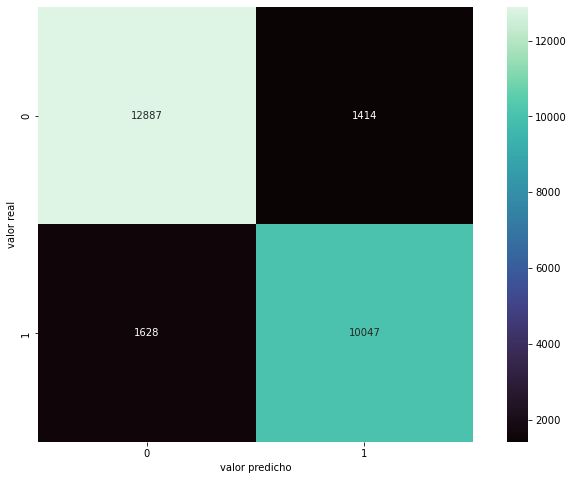

In [40]:
# Sacamos la matriz de confusión de nuestro primer modelo.
mat_lr1 = confusion_matrix(y_test1, y_pred_test)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr1, square = True, annot = True, fmt = "d", cmap = "mako")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

Recordemos que el 0 era satisfecho y el 1 insatisfecho:

En primer lugar, podemos comprobar que nuestro modelo predice 12887 satisfechos que si lo están y 1628 que no lo están en realidad. Por otro lado, predice 1414 personas que no están satisfechas, pero que si lo están, mientras que el 10047 son personas que si están satisfechos, pero que en realidad no lo están.

- Vamos a hacerlo con el no estandarizado

In [41]:
# Separamos en X (variables predictoras) e y (variable respuesta).
X2 = df_estand.drop("satisfaction", axis = 1)
y2 = df_estand["satisfaction"]

In [42]:
# Separamos en train y en test para que nos ayude a comprobar si el modelo es bueno o no prediciendo.
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

In [43]:
# Vamos a definir la regresión logistica.
log_reg2 = LogisticRegression(n_jobs = -1, max_iter = 10000)

# Vamos a ajustar el modelo.
log_reg2.fit(x_train2,y_train2)

# Vamos a obtener las predicciones para el conjunto de train y de test.
y_pred_train2 = log_reg2.predict(x_train2)
y_pred_test2 = log_reg2.predict(x_test2)

In [44]:
# Sacamos el dataframe con los resultados obtenidos y los unimos en uno.
train_df2 = pd.DataFrame({'real': y_train2, 'predicted': y_pred_train2, 'set': ['train']*len(y_train2)})
test_df2 = pd.DataFrame({'real': y_test2, 'predicted': y_pred_test2, 'set': ['test']*len(y_test2)})

resultados2 = pd.concat([train_df2, test_df2], axis = 0)
resultados2.head()

,real,predicted,set
21413,0,0,train
7284,1,1,train
86080,1,1,train
59842,1,1,train
69486,1,1,train


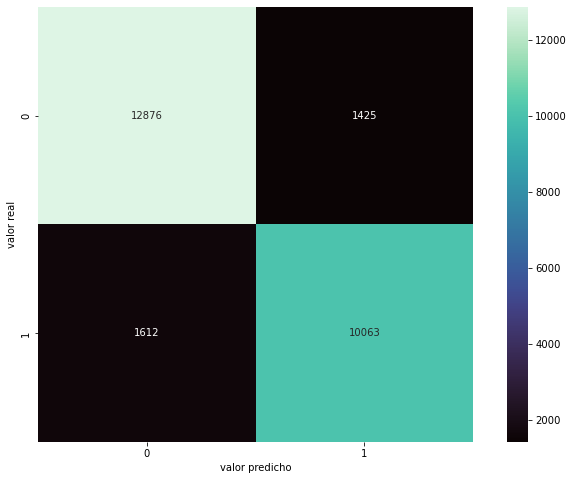

In [45]:
# Sacamos la matriz de confusión de nuestro segundo modelo.
mat_lr2 = confusion_matrix(y_test2, y_pred_test2)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr2, square = True, annot = True, fmt = "d", cmap = "mako")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

Recordemos que el 0 era satisfecho y el 1 insatisfecho:

En primer lugar, podemos comprobar que nuestro modelo predice 12886 satisfechos que si lo están y 1612 que no lo están en realidad. Por otro lado, predice 1425 personas que no están satisfechas, pero que si lo están, mientras que el 10063 son personas que si están satisfechos, pero que en realidad no lo están.

# Regresión Logística IV. Métricas.

En el ejercicio de pair programming anterior ajustastéis vuestro primer modelito de regresión logística. Ahora es el momento de saber como de bueno es nuestro modelo. Para esto, los objetivos del pair de hoy son:

- Calculad las métricas para vuestro modelo

- Interpretad las métricas obtenidas, ¿es un buen modelo? ¿hay overfitting o underfitting?

In [46]:
def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    """ 
    Esta función nos saca las métricas de nuestro modelo a predecir.
    Args: 
    clases_reales_test(serie): los datos que tenemos.
    clases_predichas_test(serie): los datos que ha predicho.
    clases_reales_train(serie): los datos que tenemos.
    clases_predichas_train(serie): los datos que ha predicho.
    modelo(string): nombre que le damos a nuestro modelo.
    Returns: devuelve un dataframe con las métricas.
    """    
    # Para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)
    
    # Para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train],
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train],
                       "f1": [f1_test, f1_train],
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    df["modelo"] = modelo
    return df

In [47]:
# Resultados obstenidos para el primer modelo.
resultados = metricas(y_test1, y_pred_test, y_train1, y_pred_train, "Regresión logistica")
resultados

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.882892,0.876625,0.860557,0.868517,0.762967,test,Regresión logistica
1,0.880592,0.873840,0.860987,0.867366,0.758796,train,Regresión logistica


In [48]:
# Resultados obstenidos para el segundo modelo.
resultados2 = metricas(y_test2, y_pred_test2, y_train2, y_pred_train2, "Regresión logistica II")
resultados2

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.883084,0.875958,0.861927,0.868886,0.763406,test,Regresión logistica II
1,0.880168,0.872739,0.861348,0.867006,0.757974,train,Regresión logistica II


In [49]:
# Unimos los resultados en un mismo dataframe.
resultados_unidos = pd.concat([resultados, resultados2], axis = 0)
resultados_unidos

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.882892,0.876625,0.860557,0.868517,0.762967,test,Regresión logistica
1,0.880592,0.873840,0.860987,0.867366,0.758796,train,Regresión logistica
0,0.883084,0.875958,0.861927,0.868886,0.763406,test,Regresión logistica II
1,0.880168,0.872739,0.861348,0.867006,0.757974,train,Regresión logistica II


- Interpretamos los resultados:

En `accuracy` nuestros modelos aciertan un 0.88% de las veces, por lo que están muy bien predichos.

En `precision` nuestros modelos aciertan un 0.87% de las veces, a la hora de predecir positivos, es decir, en los pasajeros que no están satisfechos.

En `recall` nuestros modelos aciertan un 0.86% de las veces, es capaz de identificar un 86% de los pasajeros no satisfechos.

En `kappa` nuestros modelos tienen un valor de 0.75-0.76, por lo que nuestros modelos no están acertando en las predicciones por azar, sino que están prediciendo bien.

Además, no tenemos caso de overfitting porque nuestros resultados de train y de test son muy similares. Por lo tanto, podemos concluir que nuestros modelos son bastante buenos.

Recordamos que nuestra variable respuesta es:

0 = Sastifecho
1 = No satisfecho.

Consideramos más importante los **falsos positivos**, que en este caso es predecir que el cliente no está satisfecho cuando realmente sí que lo está. Teniendo esto en cuenta, aparte de la métrica de kappa, que es la más importante, tenemos que priorizar la métrica de *recall*, ya que preferimos equivarnos en los falsos positivos, es decir, preferimos predecir que hay más gente que no está satisfecha y que realmente sí que lo están. 

Se puede apreciar que nuestra métrica de recall es muy buena, por lo que nuestro modelo está capturando el 0.86% de los casos negativos. 



In [50]:
# Guardamos el dataframe con las métricas obstenidas.
resultados_unidos.to_csv("../data/airlines_metricas.csv")